In [67]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib nbagg

<IPython.core.display.Javascript object>


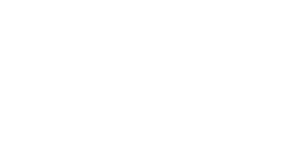

<IPython.core.display.Javascript object>


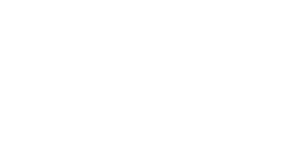

In [68]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [69]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [70]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [71]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.    0.5   0.5   0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.333 0.333 0.333 0.   ]
 [0.    0.    0.5   0.5  ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [72]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [73]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [74]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は10です


In [75]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [76]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.    0.498 0.502 0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.33  0.337 0.333 0.   ]
 [0.    0.    0.502 0.498]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [77]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.007201679542571393
迷路を解くのにかかったステップ数は162です
0.01224730589227313
迷路を解くのにかかったステップ数は46です
0.016144040475980503
迷路を解くのにかかったステップ数は40です
0.03257008675142087
迷路を解くのにかかったステップ数は6です
0.002930378034836423
迷路を解くのにかかったステップ数は66です
0.01338953424989825
迷路を解くのにかかったステップ数は22です
0.014734719450806455
迷路を解くのにかかったステップ数は30です
0.004867008526544758
迷路を解くのにかかったステップ数は70です
0.01599327990075733
迷路を解くのにかかったステップ数は20です
0.01957440013285855
迷路を解くのにかかったステップ数は20です
0.011253920231176329
迷路を解くのにかかったステップ数は36です
0.020861520322059957
迷路を解くのにかかったステップ数は8です
0.007295968069446268
迷路を解くのにかかったステップ数は154です
0.016210138685753828
迷路を解くのにかかったステップ数は28です
0.015488877220985242
迷路を解くのにかかったステップ数は22です
0.007923018369735468
迷路を解くのにかかったステップ数は136です
0.015881451759782617
迷路を解くのにかかったステップ数は42です
0.03247943074802023
迷路を解くのにかかったステップ数は6です
0.011184759617986595
迷路を解くのにかかったステップ数は40です
0.04792110021003665
迷路を解くのにかかったステップ数は4です
0.0241484634792849
迷路を解くのにかかったステップ数は8です
0.026652367408593947
迷路を解くのにかかったステップ数は20です
0.014551292019661377
迷路を解くのにかかったステップ数は10です
0.03181688880806993
迷路

0.031202369560886706
迷路を解くのにかかったステップ数は4です
0.016018562732549757
迷路を解くのにかかったステップ数は8です
0.024345856102330365
迷路を解くのにかかったステップ数は6です
0.015865206719421654
迷路を解くのにかかったステップ数は8です
0.02045982842424013
迷路を解くのにかかったステップ数は10です
0.016878048514140792
迷路を解くのにかかったステップ数は10です
0.030350076821016425
迷路を解くのにかかったステップ数は4です
0.013967654167375582
迷路を解くのにかかったステップ数は20です
0.01312409889604263
迷路を解くのにかかったステップ数は42です
0.030030652172280764
迷路を解くのにかかったステップ数は4です
0.016642433257665235
迷路を解くのにかかったステップ数は16です
0.029633916135388794
迷路を解くのにかかったステップ数は4です
0.029185574334795322
迷路を解くのにかかったステップ数は4です
0.006966738829730118
迷路を解くのにかかったステップ数は16です
0.010869285332365308
迷路を解くのにかかったステップ数は36です
0.013613848442083437
迷路を解くのにかかったステップ数は36です
0.018881098190891565
迷路を解くのにかかったステップ数は8です
0.012024488610438394
迷路を解くのにかかったステップ数は10です
0.010571965344949696
迷路を解くのにかかったステップ数は22です
0.015455686295220178
迷路を解くのにかかったステップ数は10です
0.016615010533914232
迷路を解くのにかかったステップ数は8です
0.011899310739804797
迷路を解くのにかかったステップ数は10です
0.0226972532833023
迷路を解くのにかかったステップ数は6です
0.019888293437096527
迷路を解く

limit_output extension: Maximum message size of 10000 exceeded with 12709 characters

In [78]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.011 0.989 0.   ]
 [0.    0.264 0.    0.736]
 [0.    0.    0.446 0.554]
 [0.012 0.977 0.011 0.   ]
 [0.    0.    0.988 0.012]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.018 0.982 0.    0.   ]]


In [79]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

limit_output extension: Maximum message size of 10000 exceeded with 77776 characters